In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys, os
import pandas as pd
from google.colab import drive
from google.colab import auth
auth.authenticate_user()

In [ ]:
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1wEJm8w4CTZ9OTzXXHloGuZwl3HeSuaFlqOAIXXTz86g/edit?gid=487183150#gid=487183150').sheet1
rows = worksheet.get_all_values()
import pandas as pd
df = pd.DataFrame.from_records(rows)

In [ ]:
df

,0,1,2
0,Tenda,harga,rating
1,Rempah Cengkeh Kapulaga Kayu Manis Biji Pala M...,Rp100.000,5
2,Kayu Manis 1Kg Cinnamon Stick (Tebal) - 50 Gram,Rp110.000,5
3,Kayu Manis 1 Kg/ Cinnamon Stick / Cutting 8Cm ...,Rp110.000,5
4,Kayu Manis ( Potongan Pendek ) 1000 Gr,Rp13.500,5
...,...,...,...
3303,Kayu Manis Batang / Cinnamon Stick 1Kg -05,Unknown,Unknown
3304,Cinnamon Stick 50 Gr / Kayumanis Batang 50 Gr,Unknown,Unknown
3305,Cinnamon Powder / Kayu Manis Bubuk,Unknown,Unknown
3306,Ready Cinnamon Stick 1Kg / Kayu Manis Utuh,Unknown,Unknown


In [ ]:
# Assuming the first row in Google Sheets contains the headers
column_names = rows[0]
data_rows = rows[1:]
df = pd.DataFrame.from_records(data_rows, columns=column_names)

In [ ]:
df

,Tenda,harga,rating
0,Rempah Cengkeh Kapulaga Kayu Manis Biji Pala M...,Rp100.000,5
1,Kayu Manis 1Kg Cinnamon Stick (Tebal) - 50 Gram,Rp110.000,5
2,Kayu Manis 1 Kg/ Cinnamon Stick / Cutting 8Cm ...,Rp110.000,5
3,Kayu Manis ( Potongan Pendek ) 1000 Gr,Rp13.500,5
4,Beorganik Cinnamon Stick / Kayu Manis Batang 50Gr,Rp64.800,4.9
...,...,...,...
3302,Kayu Manis Batang / Cinnamon Stick 1Kg -05,Unknown,Unknown
3303,Cinnamon Stick 50 Gr / Kayumanis Batang 50 Gr,Unknown,Unknown
3304,Cinnamon Powder / Kayu Manis Bubuk,Unknown,Unknown
3305,Ready Cinnamon Stick 1Kg / Kayu Manis Utuh,Unknown,Unknown


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tenda   3307 non-null   object
 1   harga   3307 non-null   object
 2   rating  3307 non-null   object
dtypes: object(3)
memory usage: 77.6+ KB


In [ ]:
df = df.rename(columns=lambda x: x.replace(' ', '_'))

In [ ]:
df['harga'] = df['harga'].str.replace('Rp', '')
df['harga'] = df['harga'].str.replace('.', '')
df['harga'] = df['harga'].str.replace('Unknown', '0')

In [ ]:
df['harga']

0       100000
1       110000
2       110000
3        13500
4        64800
         ...  
3302         0
3303         0
3304         0
3305         0
3306         0
Name: harga, Length: 3307, dtype: object

In [ ]:
df['harga'] = df['harga'].astype(int)

In [ ]:
df['harga'].describe()

count      3307.000000
mean       2727.267917
std       22782.176057
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      503000.000000
Name: harga, dtype: float64

In [ ]:
print(df.columns)

Index(['Tenda_', 'harga', 'rating'], dtype='object')


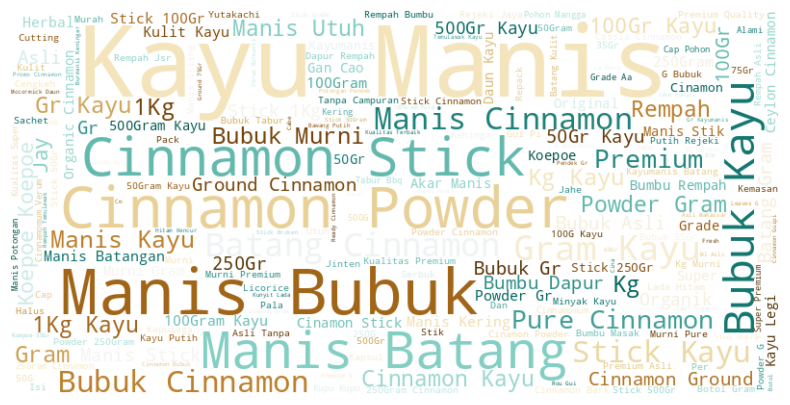

In [ ]:
# Assuming 'Tenda' is the correct column name
tenda_names_str = ' '.join(df['Tenda_'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='BrBG', stopwords=STOPWORDS).generate(tenda_names_str)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Assuming the first row in Google Sheets contains the headers
column_names = rows[0]
data_rows = rows[1:]
df = pd.DataFrame.from_records(data_rows, columns=column_names)